# Day6 — Feature selection & Train/Test split
Date: 11/10/2025
</br>Goal: Select features, encode categorical variables, and split into train/test sets.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/titanic_train.csv')
print(f"df's shape: {df.shape}\n\n")
print(f"Columns:\n {df.columns}")
df.head()

df's shape: (891, 12)


Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def preprocess_basic(df):
    df = df.copy()
    # Set 'Title'
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')  # Mr, Mrs extraction
    df['Title'] = df['Title'].str.strip()
   
    # Age: fille NaN with median values of groups
    df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # Embarked: fill with values from mode()
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # FamilySize
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    return df

df2 = preprocess_basic(df)

features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title', 'Embarked']
X = df2[features].copy()
y = df2['Survived']

In [4]:
# ?Sex, Embarked, Title -> one-hot.
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(X_train.shape)
print(X_test.shape)

(712, 23)
(179, 23)


In [6]:
num_cols = ['Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train[num_cols]

,Age,Fare,FamilySize
8,-0.153550,-0.416075,0.728468
150,1.699116,-0.388502,-0.536579
221,-0.153550,-0.379091,-0.536579
365,0.078034,-0.493013,-0.536579
324,-0.307938,0.741305,5.788655
...,...,...,...
241,-0.578119,-0.329560,0.095945
253,0.078034,-0.317672,0.095945
390,0.541200,1.740846,1.360991
667,-0.307938,-0.482611,-0.536579


# Day 7 — Baseline Models: Logistic Regression & Decision Tree 

Date: 11/11/2025

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# LogisticRegression
lr = LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

pred_lr_train = lr.predict(X_train)
print("LoginticRegression Accuracy:", np.round(accuracy_score(y_train, pred_lr_train), 2))
print("Classification Report:\n", classification_report(y_train, pred_lr_train))
pred_lr_test = lr.predict(X_test)
print("\nLoginticRegression Accuracy:", np.round(accuracy_score(y_test, pred_lr_test), 2))
print("Classification Report:\n", classification_report(y_test, pred_lr_test))

LoginticRegression Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       449
           1       0.80      0.75      0.78       263

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712


LoginticRegression Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.83      0.75      0.79        79

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179



In [11]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier - Overfitting alert.
dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)

pred_dt_train = dt.predict(X_train)
print("DecisionTreeClassifier Accuracy (train data):", np.round(accuracy_score(y_train, pred_dt_train), 2))
print("Classification Report:\n", classification_report(y_train, pred_dt_train))

pred_dt_test = dt.predict(X_test)
print("\nDecisionTreeClassifier Accuracy (test data):", np.round(accuracy_score(y_test, pred_dt_test), 2))
print("Classification Report:\n", classification_report(y_test, pred_dt_test))

DecisionTreeClassifier Accuracy (train data): 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       449
           1       0.99      0.97      0.98       263

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712


DecisionTreeClassifier Accuracy (test data): 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.74      0.67      0.70        79

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



##### -> Overfitting is suspected becuse the accuracy on the training data is significantly higher than the accuracy on the test data. 

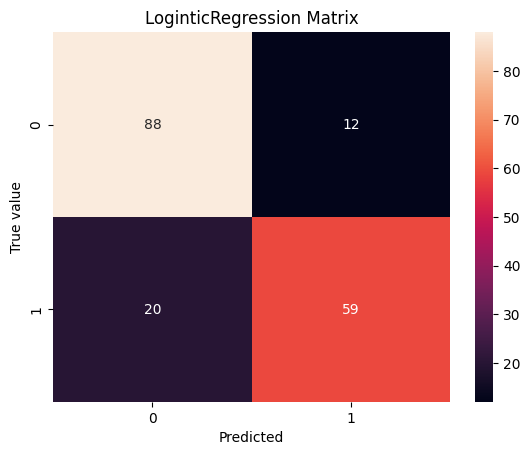

In [13]:
# Visualization
import seaborn  as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_lr_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("LoginticRegression Matrix")
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

# Day 8 — Baseline Models: Cross-validation & Metrics 

Date: 11/12/2025</br>
Goal: Use cross_val_score and corss_validate to get robust estimates (accuracy, f1, roc_auc)

In [28]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=12, n_jobs=-1)
scores = cross_validate(rf, X, y, 
                        cv=5, 
                        scoring=['accuracy', 'f1', 'roc_auc'], 
                        return_train_score=False)

for k in ['test_accuracy', 'test_f1', 'test_roc_auc']:
    print(k, np.mean(scores[k]).round(2), np.std(scores[k]).round(2))

test_accuracy 0.8 0.03
test_f1 0.74 0.05
test_roc_auc 0.86 0.03


In [24]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

skfold_scores = []

for tr_index, te_index in skfold.split(X, y):
    X_train, X_test = X.iloc[tr_index], X.iloc[te_index]
    y_train, y_test = y.iloc[tr_index], y.iloc[te_index]

    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    skfold_scores.append(acc)

print("Mean accuracy:", np.mean(skfold_scores).round(2))

Mean accuracy: 0.79
